In [1]:
#load simulation data with loadSimDataOneHot
from simDataPreprocessing import loadSimDataOneHot

data, labels = loadSimDataOneHot('/mnt/d/data/MIME_data/simData/dmMIME/seqLen100/experimentalConditions', maxNumSequences=1000000, splittingProbability=3/100, readSize=23)

first round prot1 done
first round prot6 done
first round prot15 done
first round prot 30 done


In [2]:
#split data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)

In [3]:
import numpy as np

# read in kd values
kds = np.loadtxt('/mnt/d/data/MIME_data/simData/dmMIME/seqLen100/experimentalConditions/secondFromProt1/prot1/single_kds.txt')

#insert 1 at position 0 and then every 3rd position
kds = np.insert(kds, 0, 1)
kds = np.insert(kds, np.arange(4, len(kds), 3), 1)

In [5]:
#train logsitic regression model with different regularization parameters
from sklearn.linear_model import LogisticRegression
import warnings
from scipy.stats import pearsonr
warnings.filterwarnings('ignore')

#regularization parameter C
C = [0.01, 0.1, 1, 10]

#train model for every combination of C and l1_ratio and evaluate correlation between weights and true kd values
for c in C:
    model = LogisticRegression(penalty='l2', solver='saga', C=c)
    model.fit(X_train, y_train.ravel())
    #get model weights
    weights = model.coef_[0][8:]
    #correlation between weights and log of kd values
    corr, _ = pearsonr(np.log(kds), -1*weights)        
    print("C: " + str(c) + " corr: " + str(round(corr,3)) + " score: " + str(model.score(X_test, y_test).round(3)))

C: 0.01 corr: 0.967 score: 0.779
C: 0.1 corr: 0.978 score: 0.78
C: 1 corr: 0.979 score: 0.78
C: 10 corr: 0.979 score: 0.78


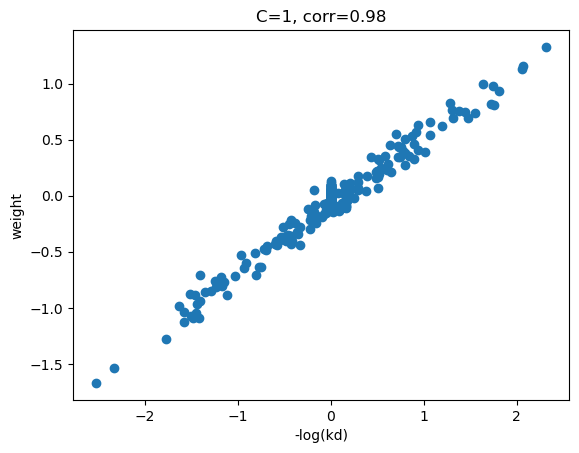

In [7]:
import matplotlib.pyplot as plt
#plot correlation between weights and log of kd values for model with C=10 and l1_ratio=0
model = LogisticRegression(penalty='l2', solver='saga', C=1)
model.fit(X_train, y_train.ravel())

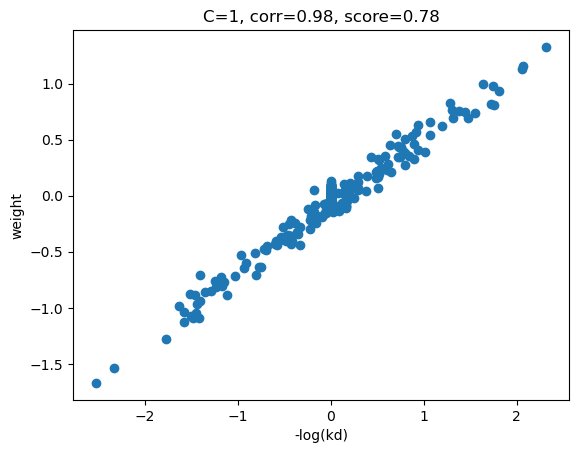

In [8]:
weights = model.coef_[0][8:]
corr, _ = pearsonr(np.log(kds), -1*weights)        
plt.scatter(-np.log(kds), weights)
plt.xlabel('-log(kd)')
plt.ylabel('weight')
plt.title(f'C=1, corr={corr:.2f}, score={model.score(X_test, y_test):.2f}')
plt.show()